<a href="https://colab.research.google.com/github/rokmr/Deep-Learning-In-Computer-Vision/blob/main/Data_Prepration_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from hugging face

##BASIC 01

In [1]:
!pip -q install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.1 MB/s eta 0:00:00


1. Load the Beans dataset by providing the load_dataset() function with the dataset name and a dataset split:

In [38]:
from datasets import load_dataset, Image
dataset = load_dataset("beans", split="train")   #Not all dataset has train and test split

In [35]:
dataset.info

DatasetInfo(description='Beans is a dataset of images of beans taken in the field using smartphone\ncameras. It consists of 3 classes: 2 disease classes and the healthy class.\nDiseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated\nby experts from the National Crops Resources Research Institute (NaCRRI) in\nUganda and collected by the Makerere AI research lab.\n', citation='@ONLINE {beansdata,\n    author="Makerere AI Lab",\n    title="Bean disease dataset",\n    month="January",\n    year="2020",\n    url="https://github.com/AI-Lab-Makerere/ibean/"\n}\n', homepage='https://github.com/AI-Lab-Makerere/ibean/', license='', features={'image_file_path': Value(dtype='string', id=None), 'image': Image(decode=True, id=None), 'labels': ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)}, post_processed=None, supervised_keys=SupervisedKeysData(input='image', output='labels'), task_templates=[ImageClassification(task='image-classification', image_col

2. Now we can add some data augmentations with any library (Albumentations, imgaug, Kornia) you like. Here, you’ll use torchvision to randomly change the color properties of an image:

In [ ]:
from torchvision.transforms import Compose, ColorJitter, ToTensor

jitter = Compose(
    [ColorJitter(brightness=0.5, hue=0.5), ToTensor()]
)

3. Create a function to apply your transform to the dataset and generate the model input: pixel_values.

In [ ]:
def transforms(examples):
    examples["pixel_values"] = [jitter(image.convert("RGB")) for image in examples["image"]]
    return examples

4. Use the with_transform() function to apply the data augmentations on-the-fly:

In [ ]:
dataset = dataset.with_transform(transforms)

Getting info about dataset

5. Set the dataset format according to the machine learning framework you’re using.

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        images.append((example["pixel_values"]))
        labels.append(example["labels"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}
dataloader = DataLoader(dataset, collate_fn=collate_fn, batch_size=4)

## BASIC 02

Check dataset info without downloading it.

In [ ]:
from datasets import load_dataset_builder
ds_builder = load_dataset_builder("rotten_tomatoes")

In [ ]:
ds_builder.info.description

"Movie Review Dataset.\nThis is a dataset of containing 5,331 positive and 5,331 negative processed\nsentences from Rotten Tomatoes movie reviews. This data was first used in Bo\nPang and Lillian Lee, ``Seeing stars: Exploiting class relationships for\nsentiment categorization with respect to rating scales.'', Proceedings of the\nACL, 2005.\n"

In [ ]:
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

Now, after checking dataset we can download it

In [ ]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes", split="train")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Dataset rotten_tomatoes downloaded and prepared to /root/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46. Subsequent calls will reuse this data.


Checking wat are the availabel dataset split:

A split is a specific subset of a dataset like train and test. List a dataset’s split names with the get_dataset_split_names() function:

In [ ]:
from datasets import get_dataset_split_names

get_dataset_split_names("rotten_tomatoes")

['train', 'validation', 'test']

In [ ]:
dataset = load_dataset("rotten_tomatoes", split="train")
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

If we don’t specify a split, Datasets returns a DatasetDict object instead:

In [ ]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")
dataset

  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [ ]:
dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

Some dataset as lots of configuration, We need to specify the configuration

In [ ]:
from datasets import get_dataset_config_names

configs = get_dataset_config_names("PolyAI/minds14")
print(configs)

['cs-CZ', 'de-DE', 'en-AU', 'en-GB', 'en-US', 'es-ES', 'fr-FR', 'it-IT', 'ko-KR', 'nl-NL', 'pl-PL', 'pt-PT', 'ru-RU', 'zh-CN', 'all']


In [ ]:
mindsFR = load_dataset("PolyAI/minds14", "fr-FR", split="train")

Generating train split: 0 examples [00:00, ? examples/s]

Dataset minds14 downloaded and prepared to /root/.cache/huggingface/datasets/PolyAI___minds14/fr-FR/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696. Subsequent calls will reuse this data.


# Iterable and Non Iterable dataset(simply Dataset)

##Dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes", split="train")

In [ ]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [ ]:
dataset[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [ ]:
dataset["text"]

In [ ]:
dataset[0]["text"]

'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .'

### Indexing Speed

In [ ]:
# This method is faster method
import timeit
start = timeit.default_timer()
dataset[0]["text"]
end = timeit.default_timer()
end-start

0.005033252000202992

In [ ]:
import timeit
start = timeit.default_timer()
dataset["text"][0]
end = timeit.default_timer()
end-start

0.01829340099993715

In [ ]:
# Slicing
dataset[:3]

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'effective but too-tepid biopic'],
 'label': [1, 1, 1]}

## Iterable Dataset

An IterableDataset is loaded when you set the streaming parameter to True in load_dataset():

An IterableDataset progressively iterates over a dataset one example at a time, so we don’t have to wait for the whole dataset to download before we can use it. As we can imagine, this is quite useful for large datasets we want to use immediately!

In [ ]:
from datasets import load_dataset
from PIL import Image

iterable_dataset = load_dataset("food101", split="train", streaming=True)


In [ ]:
iterable_dataset.info.features

{'image': Image(decode=True, id=None),
 'label': ClassLabel(names=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lo

In [ ]:
for example in iterable_dataset:
    # print(example)
    example["image"]
    break

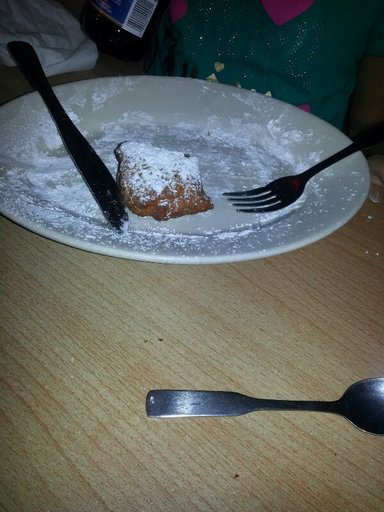

In [ ]:
example["image"]

In [ ]:
for example in iterable_dataset:
    print(example)
    break

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x7F039134EA40>, 'label': 6}


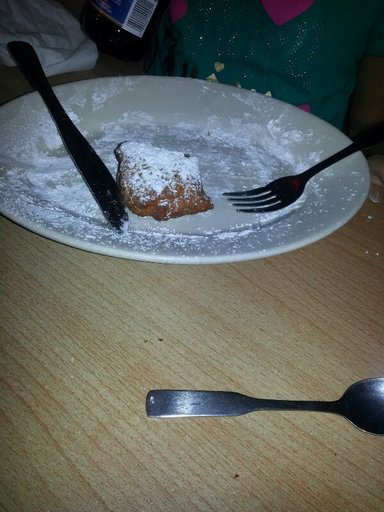

In [ ]:
next(iter(iterable_dataset))["image"].show()

In [ ]:
# Takes first 3 examples
list(iterable_dataset.take(3))

[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x7F0395018430>,
  'label': 6},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F0395018A90>,
  'label': 6},
 {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x383 at 0x7F0395018640>,
  'label': 6}]

# Preposessing

## Data Augmentation

In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoFeatureExtractor
from datasets import load_dataset, Image

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
dataset = load_dataset("beans", split="train")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


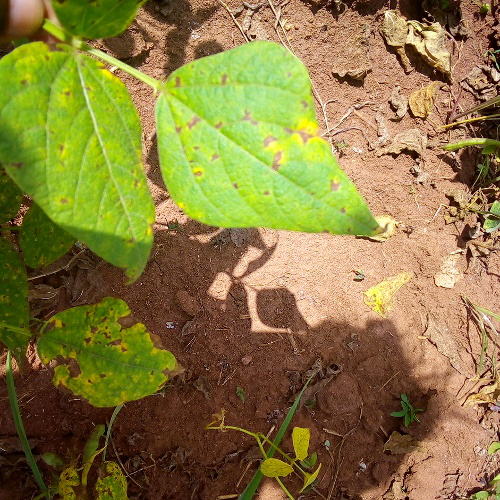

In [ ]:
dataset[0]["image"]

In [ ]:
from torchvision.transforms import RandomRotation

rotate = RandomRotation(degrees=(0, 90))
def transforms(examples):
    examples["pixel_values"] = [rotate(image.convert("RGB")) for image in examples["image"]]
    return examples


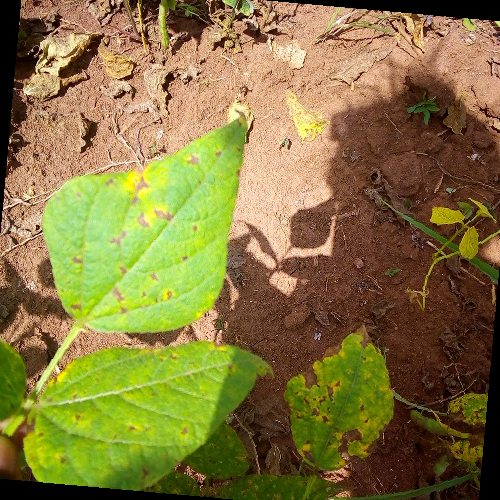

In [ ]:
dataset.set_transform(transforms)
dataset[0]["pixel_values"]

# Evaluation

In [ ]:
from datasets import list_metrics
metrics_list = list_metrics()
len(metrics_list)

156

In [ ]:
print(metrics_list)

['accuracy', 'bertscore', 'bleu', 'bleurt', 'brier_score', 'cer', 'character', 'charcut_mt', 'chrf', 'code_eval', 'comet', 'competition_math', 'coval', 'cuad', 'exact_match', 'f1', 'frugalscore', 'glue', 'google_bleu', 'indic_glue', 'mae', 'mahalanobis', 'mape', 'mase', 'matthews_correlation', 'mauve', 'mean_iou', 'meteor', 'mse', 'nist_mt', 'pearsonr', 'perplexity', 'poseval', 'precision', 'r_squared', 'recall', 'rl_reliability', 'roc_auc', 'rouge', 'sacrebleu', 'sari', 'seqeval', 'smape', 'spearmanr', 'squad', 'squad_v2', 'super_glue', 'ter', 'trec_eval', 'wer', 'wiki_split', 'xnli', 'xtreme_s', 'AlhitawiMohammed22/CER_Hu-Evaluation-Metrics', 'BucketHeadP65/confusion_matrix', 'BucketHeadP65/roc_curve', 'Drunper/metrica_tesi', 'Felipehonorato/eer', 'GMFTBY/dailydialog_evaluate', 'GMFTBY/dailydialogevaluate', 'He-Xingwei/sari_metric', 'JP-SystemsX/nDCG', 'Josh98/nl2bash_m', 'KevinSpaghetti/accuracyk', 'Kyle1668/squad', 'Muennighoff/code_eval', 'NCSOFT/harim_plus', 'NikitaMartynov/spell

In [ ]:
# from datasets import load_metric
# metric = load_metric('glue', 'mrpc')
# model_predictions = model(model_inputs)
# final_score = metric.compute(predictions=model_predictions, references=gold_references)

# Loading Your own dataset

In [2]:
import skimage
import matplotlib.pyplot as plt

In [5]:
import os
os.mkdir("pets")

In [ ]:
!unzip /content/drive/MyDrive/IISC/pet.zip

In [16]:
dir = "/content/pet"
datasets = os.listdir(dir)

In [21]:
for dataset in datasets:
  data = os.path.join(dir, dataset)
  for cls in os.listdir(data):
    path = os.path.join(data, cls)
    files = os.listdir(path)
    for i, img in enumerate(files):
      os.rename(os.path.join(path, img), os.path.join(path, ''.join([str(i), '.jpg'])))

In [ ]:
!zip -r /content/mini_pet.zip /content/pet

In [24]:
!pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.0 MB/s eta 0:00:00


In [26]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) 

Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

In [30]:
from datasets import load_dataset

dataset = load_dataset("/content/pet")
dataset.push_to_hub("rokmr/mini_pets")

Resolving data files:   0%|          | 0/886 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/886 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

HfHubHTTPError: ignored

In [13]:
from datasets import load_dataset, Image
dataset = load_dataset("rokmr/mini_pets", split="train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/rokmr___imagefolder/default-7c77226e0f38d017/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


In [15]:
dataset.info

DatasetInfo(description='mini_pets is a dataset of images of pets (cats, dogs & rabbits) taken from web. It consists of 3 classes: 3. Data was annotated\nby myself from the ', citation='', homepage='https://github.com/rokmr', license='MIT', features={'image': Image(decode=True, id=None), 'label': ClassLabel(names=['cat', 'dog', 'rabbit'], id=None)}, post_processed=None, supervised_keys=None, task_templates=[ImageClassification(task='image-classification', image_column='image', label_column='label')], builder_name=None, config_name=None, version=None, splits={'train': SplitInfo(name='train', num_bytes=135362, num_examples=886, shard_lengths=None, dataset_name='imagefolder'), 'test': SplitInfo(name='test', num_bytes=22639, num_examples=150, shard_lengths=None, dataset_name='imagefolder')}, download_checksums={'https://huggingface.co/datasets/rokmr/mini_pets/resolve/0ef953e6a7106c9f404afbddf153f7be9e69dcba/data/train.zip': {'num_bytes': 19943727, 'checksum': None}, 'https://huggingface.co

In [ ]:
from torchvision.datasets import ImageFolder

dataset = load_dataset("imagefolder", data_dir="/content/pokemon")   # put your folder
# Format pokemon/train/......jpeg
# Format pokemon/test/......jpeg